
1. Explore Singapore's traffic camera API and map the locations of the      cameras (Part I)
2. Make two one-month API calls to collect the initial data (Part II) 
3. Collecting massive amounts of image data from API (Part III) 
4. Prepare for GPU-enabled object detection (Part III) 
5. Using computer vision to count traffic in 2019 and 2020 (Part IV) 
6. Compare the traffic between two years (Part V)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Introduction
<font color='green'>Interested in seeing how traffic levels have changed between Jan 2019 - a normal year, and Jan 2020 - a COVID year in Singapore.

Hypothesis is that the levels have dropped, and determined to find out through looking at the traffic cameras and computer vision.
</font>

In this Part, we will do the following:
1. Explore the traffic camera API from Singapore's Data.gov.sg
2. Map the locations of the traffic camera in Singapore
3. Identify the best camera to focus on for data collection

### Step 1: Install libraries

- geopandas
- libproj-dev proj-data proj-bin <strong>(use apt-get install instead)</strong>
- libgeos-dev <strong>(use apt-get install instead)</strong>
- cython
- cartopy
- geoplot



In [ ]:
# Step 1: Install libraries
!pip install geopandas
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy
!pip install geoplot

     |████████████████████████████████| 1.0 MB 4.0 MB/s 
     |████████████████████████████████| 16.7 MB 17.4 MB/s 
     |████████████████████████████████| 6.3 MB 47.6 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 32.3 kB of archives.
After this operation, 110 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 32.3 kB in 1s (39.6 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 155335 files and directories currently installed.)
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.

### Step 2: Import libraries



In [ ]:
# Step 2: Import libraries
import requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import geoplot as gplt

# API Exploration
For the project, we will be collecting data from Data.gov.sg, a massive open government database.

Data.gov.sg is pretty cool, and one of the many APIs you can call is the traffic image API (<a href="https://data.gov.sg/dataset/traffic-images">link<a>).



### Step 3: Call API
We'll be making an API call for the date of 2019-01-01, at 00:00:00. 


In [ ]:
# Step 3a: Declare the request URL
url="https://api.data.gov.sg/v1/transport/traffic-images"
# Step 3b: Make an API request and save the results in a variable

import datetime
date = datetime.datetime(2019, 1, 1, 0, 0, 00)
print(date.strftime("%Y-%m-%dT%H:%M:%S"))
params={
   "date_time" : date.strftime("%Y-%m-%dT%H:%M:%S")
}
data=requests.get(url,params=params)

# Step 5b: declare another variable, and save the JSON in it
import json
data_json=data.json()
# Step 5c: peek at your JSON
data_json

2019-01-01T00:00:00


{'api_info': {'status': 'healthy'},
 'items': [{'cameras': [{'camera_id': '1501',
     'image': 'https://images.data.gov.sg/api/traffic-images/2018/12/bc2c0b04-57d6-49a7-9512-bd1fe7d46144.jpg',
     'image_metadata': {'height': 240,
      'md5': '95feb086c24db3ac1be9b1e6dc194194',
      'width': 320},
     'location': {'latitude': 1.27414394350065, 'longitude': 103.851316802547},
     'timestamp': '2018-12-31T23:59:44+08:00'},
    {'camera_id': '1502',
     'image': 'https://images.data.gov.sg/api/traffic-images/2018/12/28348084-e55a-4df9-a663-b6fb05c0f2f8.jpg',
     'image_metadata': {'height': 240,
      'md5': 'd2dbeaed33ac9a523eb8f9a4138657d0',
      'width': 320},
     'location': {'latitude': 1.27135090682664, 'longitude': 103.861828440597},
     'timestamp': '2018-12-31T23:59:44+08:00'},
    {'camera_id': '1503',
     'image': 'https://images.data.gov.sg/api/traffic-images/2018/12/dd0bbbbf-9e86-40d7-8ce8-0d35f23dfc8f.jpg',
     'image_metadata': {'height': 240,
      'md5': 'fdd

### Step 4: Turn the appropriate JSON response into a DataFrame
Now that we know that the response contains our JSON, let's rearrange the JSON into a proper DataFrame. 



In [ ]:
# Step 5: Get a DataFrame from the JSON
data=pd.json_normalize(data_json,record_path =['items','cameras'])
data.head()

,timestamp,image,camera_id,location.latitude,location.longitude,image_metadata.height,image_metadata.width,image_metadata.md5
0,2018-12-31T23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1501,1.274144,103.851317,240,320,95feb086c24db3ac1be9b1e6dc194194
1,2018-12-31T23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1502,1.271351,103.861828,240,320,d2dbeaed33ac9a523eb8f9a4138657d0
2,2018-12-31T23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1503,1.270664,103.856978,240,320,fdd3313e5a4a2b786444a7371db349c9
3,2018-12-31T23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1504,1.294099,103.876056,240,320,b8f1220bff0f26bc0ec11521e2b16fc1
4,2018-12-31T23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1505,1.275298,103.866390,240,320,ba53008cf3198ed272e8d35e52db1354


# Mapping the data

### Step 6: Download the SHP file for Singapore's map
Now that we have acquired a set of coordinates for the traffic cameras. We'll need to place them on the Singapore map.

To do this, we can use another Data.gov.sg's dataset, over <a href='https://data.gov.sg/dataset/master-plan-2014-planning-area-boundary-no-sea'>here</a>. 


After you unzip the file, upload the entire folder into your Google Drive folder containing the project.



### Step 7: Read the SHP file into a GeoDataFrame
Just like how you read a CSV with pandas, use the GeoPandas library to read_file with the .shp file.


In [ ]:
# Step 7: Read the SHP file that you uploaded 
singapore=gpd.read_file("/content/drive/MyDrive/traffic/master-plan-2014-planning-area-boundary-no-sea-shp/MP14_PLNG_AREA_NO_SEA_PL.shp")
singapore.head()

,OBJECTID,PLN_AREA_N,PLN_AREA_C,CA_IND,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,geometry
0,1,ANG MO KIO,AM,N,NORTH-EAST REGION,NER,E5CBDDE0C2113055,2016-05-11,28976.8763,40229.1238,17494.240190,1.394138e+07,"POLYGON ((30658.500 42047.527, 30679.195 42020..."
1,2,BEDOK,BD,N,EAST REGION,ER,1719251260799DF6,2016-05-11,38582.6650,34032.0961,21872.798962,2.173319e+07,"POLYGON ((38974.269 36138.243, 39371.471 35747..."
2,3,BISHAN,BS,N,CENTRAL REGION,CR,BA616285F402846F,2016-05-11,28789.7630,37450.8865,13517.121556,7.618921e+06,"POLYGON ((29772.191 38311.805, 29784.826 38304..."
3,4,BOON LAY,BL,N,WEST REGION,WR,A3DC87118B43CDED,2016-05-11,13410.3824,33008.9884,18528.467448,8.279408e+06,"POLYGON ((12861.383 32207.492, 12860.555 32208..."
4,5,BUKIT BATOK,BK,N,WEST REGION,WR,FB44C870B04B7F57,2016-05-11,19255.4150,37527.6527,15234.223423,1.113326e+07,"POLYGON ((20294.455 39114.528, 20334.318 39054..."


### Step 8: Convert the Singaporean map's coordinate system
Currently, the x and y coordinates of the Singapore polygons are not in your usual longitude and latitude. 

Instead, they are currently in SYV21 format and will require some conversion.

Use the .to_crs method of the GeoDataFrame, with "EPSG:4326" as the argument. EPSG:4326 is the standard coordinate system used in GPS.



In [ ]:
singapore.crs

<Projected CRS: PROJCS["SVY21",GEOGCS["SVY21[WGS84]",DATUM["WGS_19 ...>
Name: SVY21
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
singapore = singapore.to_crs(epsg=4326)
singapore.head()

,OBJECTID,PLN_AREA_N,PLN_AREA_C,CA_IND,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,geometry
0,1,ANG MO KIO,AM,N,NORTH-EAST REGION,NER,E5CBDDE0C2113055,2016-05-11,28976.8763,40229.1238,17494.240190,1.394138e+07,"POLYGON ((103.85721 1.39654, 103.85739 1.39630..."
1,2,BEDOK,BD,N,EAST REGION,ER,1719251260799DF6,2016-05-11,38582.6650,34032.0961,21872.798962,2.173319e+07,"POLYGON ((103.93193 1.34309, 103.93550 1.33956..."
2,3,BISHAN,BS,N,CENTRAL REGION,CR,BA616285F402846F,2016-05-11,28789.7630,37450.8865,13517.121556,7.618921e+06,"POLYGON ((103.84924 1.36275, 103.84936 1.36268..."
3,4,BOON LAY,BL,N,WEST REGION,WR,A3DC87118B43CDED,2016-05-11,13410.3824,33008.9884,18528.467448,8.279408e+06,"POLYGON ((103.69729 1.30754, 103.69728 1.30755..."
4,5,BUKIT BATOK,BK,N,WEST REGION,WR,FB44C870B04B7F57,2016-05-11,19255.4150,37527.6527,15234.223423,1.113326e+07,"POLYGON ((103.76408 1.37001, 103.76444 1.36947..."


In [ ]:
singapore.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Step 9: Turn the DataFrame from Step 5 into GeoDataFrame
We'll need to plot the camera locations on the map we got from Step 8, so let's convert the DataFrame from Step 5 into a GeoDataFrame.


You'll also need to create a new colume named 'geometry' when loading your DataFrame into a GeoDataFrame.

In [ ]:
# Step 9: Get a GeoDataFrame from the DataFrame from Step 5
geodata=gpd.GeoDataFrame(data,geometry=gpd.points_from_xy(data["location.longitude"], data["location.latitude"]))
geodata.head()

,timestamp,image,camera_id,location.latitude,location.longitude,image_metadata.height,image_metadata.width,image_metadata.md5,geometry
0,2018-12-31T23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1501,1.274144,103.851317,240,320,95feb086c24db3ac1be9b1e6dc194194,POINT (103.85132 1.27414)
1,2018-12-31T23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1502,1.271351,103.861828,240,320,d2dbeaed33ac9a523eb8f9a4138657d0,POINT (103.86183 1.27135)
2,2018-12-31T23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1503,1.270664,103.856978,240,320,fdd3313e5a4a2b786444a7371db349c9,POINT (103.85698 1.27066)
3,2018-12-31T23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1504,1.294099,103.876056,240,320,b8f1220bff0f26bc0ec11521e2b16fc1,POINT (103.87606 1.29410)
4,2018-12-31T23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1505,1.275298,103.866390,240,320,ba53008cf3198ed272e8d35e52db1354,POINT (103.86639 1.27530)


### Step 10: Plot the camera coordinates over the Singapore map
Now that we have prepared both datasets as DataFrames, it's time to plot them over each other so you can see where they are.


/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


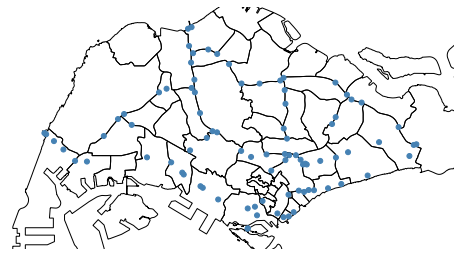

In [ ]:
# Step 10: Plot camera coordinats over the Singapore map
import geoplot.crs as gcrs
# ax = gplt.webmap(singapore, projection=gcrs.WebMercator())
ax=gplt.polyplot(singapore)

gplt.pointplot(geodata,ax=ax)


### Step 11: Label the points with camera ID


/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


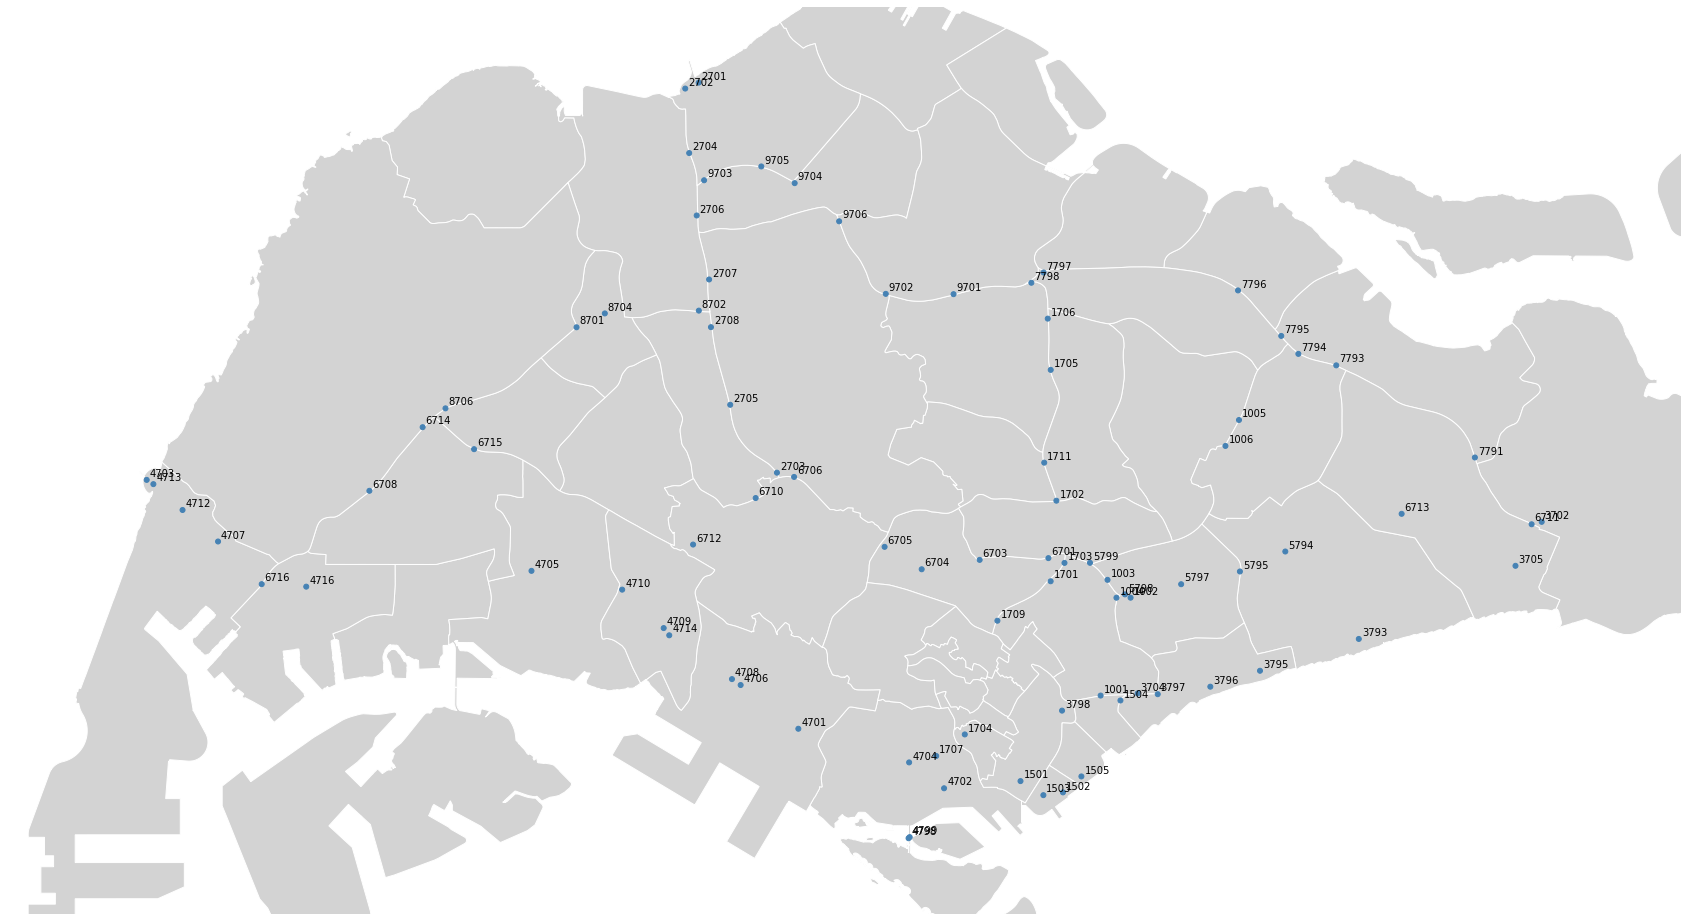

In [ ]:
# Step 11: Plot the map with the camera and add labels on the camera locations
import geoplot.crs as gcrs

ax=gplt.polyplot(singapore,figsize=(30, 18),
    edgecolor='white', facecolor='lightgray',)

gplt.pointplot(geodata,ax=ax)
for x, y, label in zip(geodata.geometry.x, geodata.geometry.y, geodata.camera_id):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

### Step 12: Download and view images



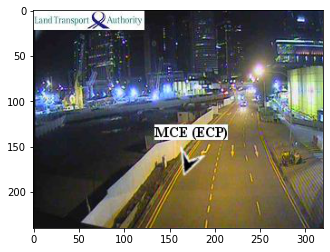

In [ ]:
from PIL import Image
import requests
import matplotlib.pyplot as plt
url=str(geodata["image"][0])
response = requests.get(url, stream=True)
img = Image.open(response.raw)
img.save("/content/images/"+geodata["camera_id"][0]+".jpg")
plt.imshow(img)
plt.show()